<b>Sentiment analysis is a natural language processing approach that is frequently used in customer evaluations to ascertain the emotional undertone of a series of words. Sentiment analysis aims to categorize a text's sentiment as either positive, negative, or neutral.</b>

<b>The main goal of this project is to categorize the product based on the reviews provided. The categorization depends on the attributes taken from a dataset of the popular e-commerce website.</b>

<b>Libraries required:</b>
<ul>
    <li><b>Pandas:</b> Python data analysis and manipulation open-source library. It features a number of tools for dealing with data, including data cleaning, transformation, and visualization, and offers data structures for effectively storing and managing massive datasets.</li>
    <li><b>Matplotlib:</b> Prominent Python charting package that offers a large selection of programmable 2D and 3D graphs. A wide range of plots, including line plots, scatter plots, bar plots, histograms, and many more, may be made by users.</li>
    <li><b>Numpy:</b> Large, multi-dimensional arrays and matrices are supported by a well-known Python library for scientific computing, which also offers a number of sophisticated mathematical operations to work on big arrays.</li>
    
</ul>

In [1]:
'''Importing required libraries'''
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore') # Hides warning
data = "C:\\Users\\arraa\\OneDrive\\Desktop\\UC\\masters spring sem\\MSIT\\ML AND DM\\Amazon_customer_reviews.csv"
data_set = pd.read_csv(data)
data_set.head(2)

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman


<b>Description of the Dataset</b>

In [2]:
data_set.describe()

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,1.0,34131.000000,34627.000000,0.0,0.0
mean,111372787.0,0.630248,4.584573,NaN,NaN
std,NaN,13.215775,0.735653,NaN,NaN
min,111372787.0,0.000000,1.000000,NaN,NaN
25%,111372787.0,0.000000,4.000000,NaN,NaN
50%,111372787.0,0.000000,5.000000,NaN,NaN
75%,111372787.0,0.000000,5.000000,NaN,NaN
max,111372787.0,814.000000,5.000000,NaN,NaN


<b>Information of the dataset consisting of the information of all the attributes</b>

In [3]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

<b>Plotting of the numerical attributes: reviews.id, reviews.numHelpful, reviews.rating, reviews.province, reviews.city</b>

array([[<AxesSubplot:title={'center':'reviews.id'}>,
        <AxesSubplot:title={'center':'reviews.numHelpful'}>],
       [<AxesSubplot:title={'center':'reviews.rating'}>,
        <AxesSubplot:title={'center':'reviews.userCity'}>],
       [<AxesSubplot:title={'center':'reviews.userProvince'}>,
        <AxesSubplot:>]], dtype=object)

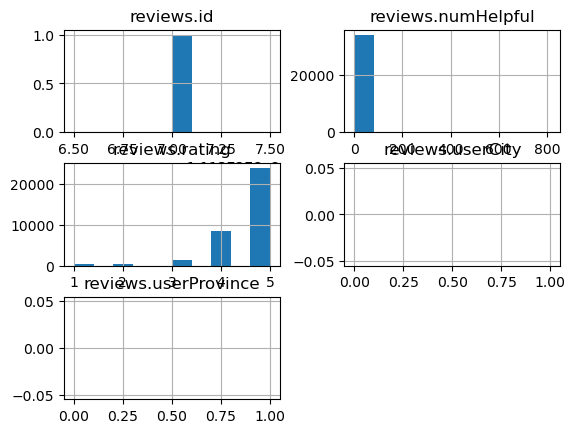

In [4]:
data_set.hist()

<b>We are using the Scikit-learn library's StratifiedShuffleSplit module to split the dataset into train and test sets, preserving the distribution of the target variable.</b>
<ul>
    <li>Dropping all the rows that contain missing values in the reviews.rating column using the dropna() method.</li>
    <li>converting the reviews.rating column to an integer data type using the astype() method. This is necessary because the target variable is expected to be a numerical data type in most machine learning algorithms.</li>
<li>In order to provide representative samples for machine learning algorithms, it is helpful to ensure that the train and test sets have a comparable distribution of target variable values. </li>
</ul>

In [5]:
from sklearn.model_selection import StratifiedShuffleSplit
data_set_x = data_set.dropna(subset=["reviews.rating"])
data_set_x["reviews.rating"] = data_set_x["reviews.rating"].astype(int)

In [6]:
split = StratifiedShuffleSplit(n_splits=5, test_size=0.2)
for train_index, test_index in split.split(data_set_x, data_set_x["reviews.rating"]): 
    train = data_set_x.reindex(train_index)
    test = data_set_x.reindex(test_index)

In [7]:
train["reviews.rating"].value_counts()/len(train)

5.0    0.687340
4.0    0.246381
3.0    0.042381
1.0    0.011769
2.0    0.011155
Name: reviews.rating, dtype: float64

In [8]:
test["reviews.rating"].value_counts()/len(test)

5.0    0.681201
4.0    0.247329
3.0    0.046636
2.0    0.013283
1.0    0.010684
Name: reviews.rating, dtype: float64

In [9]:
corr = train.corr()

In [10]:
corr

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
reviews.id,NaN,NaN,NaN,NaN,NaN
reviews.numHelpful,NaN,1.000000,-0.039881,NaN,NaN
reviews.rating,NaN,-0.039881,1.000000,NaN,NaN
reviews.userCity,NaN,NaN,NaN,NaN,NaN
reviews.userProvince,NaN,NaN,NaN,NaN,NaN


<b>Correlation:</b> A statistical method called correlation assesses how closely two variables are related to one another. It is frequently done in data analysis to look at the relationship between two numerical variables.

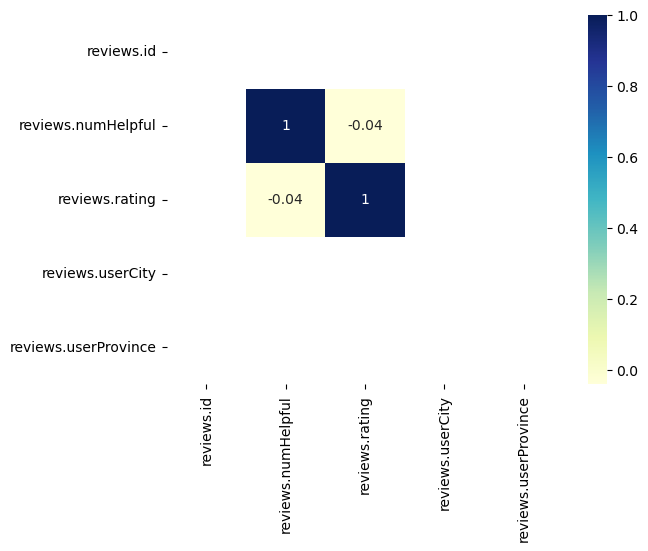

In [11]:
import seaborn as sb
dataplot = sb.heatmap(corr, cmap="YlGnBu", annot=True)

<b>Getting information of the training dataset which is split by using stratified split method. The train dataset is 80% of the original dataset</b>

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27701 entries, 1401 to 21229
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    27674 non-null  object 
 1   name                  22254 non-null  object 
 2   asins                 27672 non-null  object 
 3   brand                 27674 non-null  object 
 4   categories            27674 non-null  object 
 5   keys                  27674 non-null  object 
 6   manufacturer          27674 non-null  object 
 7   reviews.date          27658 non-null  object 
 8   reviews.dateAdded     19207 non-null  object 
 9   reviews.dateSeen      27674 non-null  object 
 10  reviews.didPurchase   0 non-null      object 
 11  reviews.doRecommend   27254 non-null  object 
 12  reviews.id            0 non-null      float64
 13  reviews.numHelpful    27303 non-null  float64
 14  reviews.rating        27674 non-null  float64
 15  reviews.sourceUR

<b>A user-defined function is created</b>
<ul>
    <li>Establishes the sentiments function, which receives a rating as input and outputs a sentiment (positive, neutral, or negative) depending on the rating.</li>
<li>Based on a set of criteria, the function assigns the rating to one of the three sentiment groups.</li>
<li>The sentiments function is applied to the reviews using the apply() method.The sentiment values obtained from the rating column of the train and test dataframes are recorded in new Sentiment columns in each dataframe.</li>
<li>Only the first 20 rows of the train dataframe's first 20 rows have the Sentiment column produced.</li>
<li>A supervised learning model may be used to predict the sentiment of incoming reviews based on their rating by using the generated Sentiment column in both the train and test dataframes as a target variable.</li>
    </ul>

In [13]:
def sentiments(rating):
    if (rating == 5) or (rating == 4):
        return "Positive"
    elif rating == 3:
        return "Neutral"
    elif (rating == 2) or (rating == 1):
        return "Negative"
train["Sentiment"] = train["reviews.rating"].apply(sentiments)
test["Sentiment"] = test["reviews.rating"].apply(sentiments)
train["Sentiment"][:20]

1401     Positive
3092     Positive
11379    Positive
19784    Positive
21749    Positive
25070    Positive
16632    Positive
10854    Positive
23456    Positive
26402    Positive
13410    Positive
6991     Positive
24125    Positive
6018     Positive
27003    Positive
30424    Positive
9714     Positive
28076    Positive
3109     Positive
17078    Positive
Name: Sentiment, dtype: object

In [14]:
X_train = train["reviews.text"]
X_train_target = train["Sentiment"]
X_test = test["reviews.text"]
X_test_target = test["Sentiment"]
print(len(X_train), len(X_test))

27701 6926


<ul>
    <li>Uses the fillna() function to replace any missing values in the X_train, X_test, X_train_target, and X_test_target dataframes with empty strings. In order for the data to be correctly handled by the CountVectorizer module in the following phase, this is done.</li>
    <li>Creates a new instance of the text preparation and occurrence counting CountVectorizer() module. This module creates a token count matrix from the text data in the X_train dataframe.</li>
    <li>The X_train dataframe is transformed into a sparse matrix of token counts by fitting the CountVectorizer() object to it using the fit_transform() function. The resultant matrix is kept in the variable X_train_counts, which stands for the preprocessed and vectorized text data that may be utilized for developing a machine learning model. The X_train_counts shape property prints the matrix's dimensions, including the number of rows (samples) and columns. (features).</li>
    </ul>

In [15]:
X_train = X_train.fillna(' ')
X_test = X_test.fillna(' ')
X_train_target = X_train_target.fillna(' ')
X_test_target = X_test_target.fillna(' ')

# Text preprocessing and occurance counting
from sklearn.feature_extraction.text import CountVectorizer 
vect = CountVectorizer()
X_train_counts = vect.fit_transform(X_train) 
X_train_counts.shape

(27701, 12494)

<ul>
    <li>The TfidfTransformer() module is used to extract text features. The count matrix from CountVectorizer() is transformed into a normalized term frequency-inverse document frequency (TF-IDF) representation using TfidfTransformer(). This aids in determining the relative weight of each word in the text data and is frequently applied to raise the precision of text classification models.</li>
    </ul>

In [16]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer(use_idf=False)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(27701, 12494)

<b>Training a model using pipeline</b>

<b>MultinomialNB:</b> It is a machine learning method from the Naive Bayes family that is frequently employed for text classification tasks including sentiment analysis and topic modeling. It estimates the probability of each feature given each class using a multinomial distribution and is predicated on the idea that the features (words) are conditionally independent given the class (sentiment or topic).

In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
clf_multiNB_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("NB", MultinomialNB())])
clf_multiNB_pipe.fit(X_train, X_train_target)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('NB', MultinomialNB())])

In [18]:
import numpy as np
predictedMultiNB = clf_multiNB_pipe.predict(X_test)
a1 = np.mean(predictedMultiNB == X_test_target)
a1

0.9283857926653191

A scatter plot to show how the MultinomialNB model's projected target values for the test dataset compare to the real target values. The graphic also contains a diagonal line that indicates perfect prediction; any points above or below the line denote over- or under-predictions, respectively.

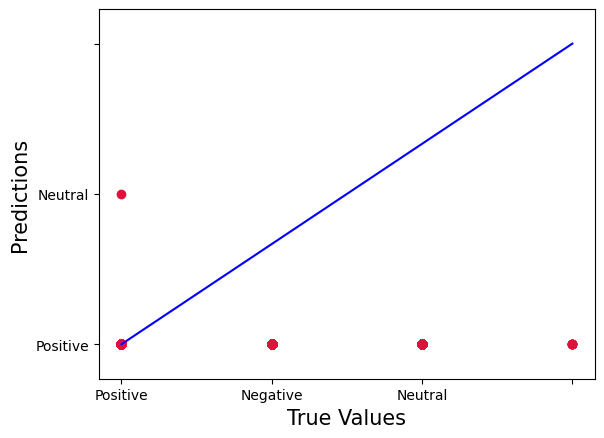

In [19]:
plt.scatter(X_test_target, predictedMultiNB, c='crimson')
p1 = max(max(predictedMultiNB), max(X_test_target))
p2 = min(min(predictedMultiNB), min(X_test_target))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

<b>Logistic Regression: </b>For binary and multiple-class classification tasks, the machine learning method logistic regression is utilized. It does this by fitting a logistic regression equation to a linear combination of the input characteristics, which predicts the likelihood of the dependent variable (goal). The class with the highest probability is then predicted after separating the classes based on their probability estimations using a decision boundary. In a variety of industries, including healthcare, banking, and social sciences, logistic regression is an extensively used method.

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
clf_logReg_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("logReg", LogisticRegression())])
clf_logReg_pipe.fit(X_train, X_train_target)

import numpy as np
predictedLogReg = clf_logReg_pipe.predict(X_test)
a2 = np.mean(predictedLogReg == X_test_target)
a2

0.9309846953508518

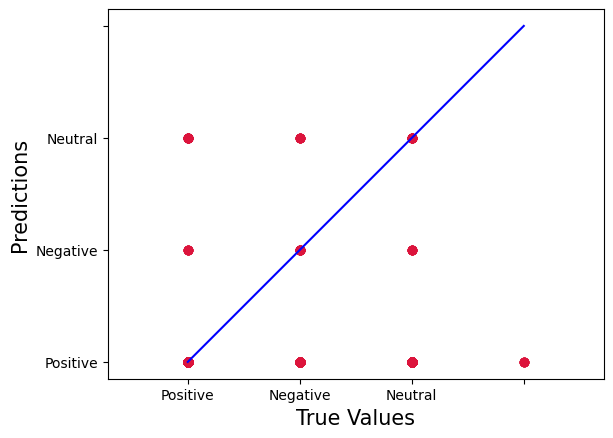

In [21]:
plt.scatter(X_test_target, predictedLogReg, c='crimson')
p1 = max(max(predictedLogReg), max(X_test_target))
p2 = min(min(predictedLogReg), min(X_test_target))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

<b>LinearSVC: </b>Binary and multi-class classification tasks are handled by the machine learning method linearSVC. It is based on the Support Vector Machine (SVM) technique that separates the classes by locating the hyperplane that optimizes the margin between them using a linear kernel function. It is often used in bioinformatics, image classification, and natural language processing and is especially helpful when working with huge datasets and high-dimensional feature spaces.

In [22]:
from sklearn.svm import LinearSVC
clf_linearSVC_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("SVC", LinearSVC())])
clf_linearSVC_pipe.fit(X_train, X_train_target)

predictedLinearSVC = clf_linearSVC_pipe.predict(X_test)
a3 = np.mean(predictedLinearSVC == X_test_target)
a3

0.931273462315911

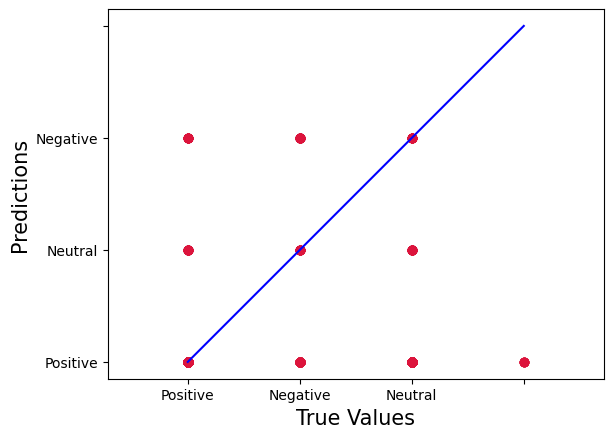

In [23]:
plt.scatter(X_test_target, predictedLinearSVC, c='crimson')
p1 = max(max(predictedLinearSVC), max(X_test_target))
p2 = min(min(predictedLinearSVC), min(X_test_target))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

<b>DecisionTreeClassifier: </b>A machine learning algorithm called DecisionTreeClassifier is employed for classification jobs. By repeatedly dividing the data into subsets according to the values of the input features, it creates a decision tree model and selects the feature that maximizes information gain at each split. By lowering the impurity or entropy of each split, the method seeks to build a tree that accurately predicts the target variable. Decision trees are frequently utilized in industries like finance, medicine, and engineering because they are simple to understand and depict.

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf_decisionTree_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), 
                                  ("decisionTree", DecisionTreeClassifier())])
clf_decisionTree_pipe.fit(X_train, X_train_target)

predictedDecisionTree = clf_decisionTree_pipe.predict(X_test)
a4 = np.mean(predictedDecisionTree == X_test_target)
a4

0.8907017037250938

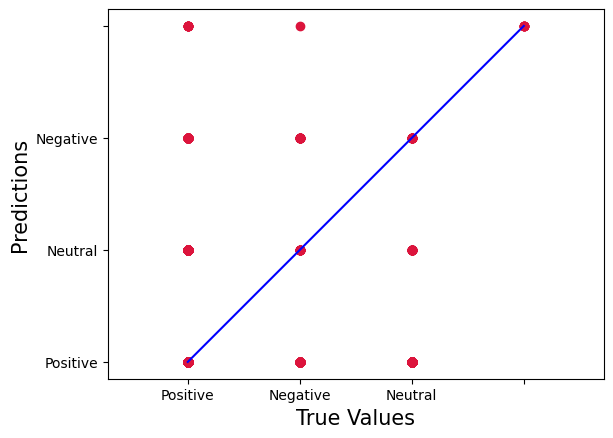

In [25]:
plt.scatter(X_test_target, predictedDecisionTree, c='crimson')
p1 = max(max(predictedDecisionTree), max(X_test_target))
p2 = min(min(predictedDecisionTree), min(X_test_target))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

<b>RandomForestClassifier: </b>A machine learning method called RandomForestClassifier is employed for classification jobs. It is an ensemble learning technique that uses a random subset of the features and a random subset of the data to build a collection of decision trees. The technique uses a voting or averaging scheme to integrate the predictions of various trees to arrive at a final forecast. Compared to single decision trees, random forests are more resilient to noisy and correlated features and less prone to overfitting. They are extensively utilized in a variety of industries, including as biology, marketing, and finance.

In [26]:
from sklearn.ensemble import RandomForestClassifier
clf_randomForest_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("randomForest", RandomForestClassifier())])
clf_randomForest_pipe.fit(X_train, X_train_target)

predictedRandomForest = clf_randomForest_pipe.predict(X_test)
a5 = np.mean(predictedRandomForest == X_test_target)
a5

0.9288189431129079

(-1.1087490225657695,
 1.106860131004028,
 -1.1227900326639315,
 1.2131913383727702)

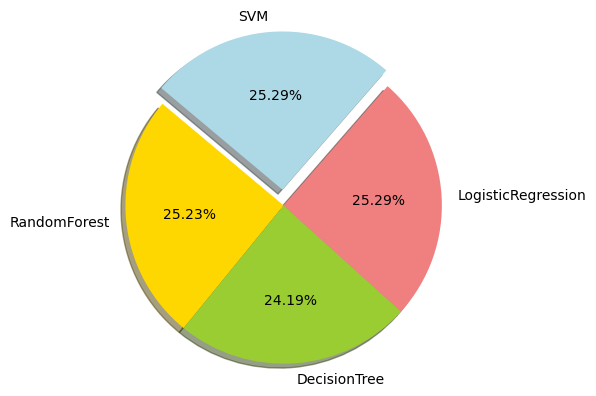

In [27]:
lab='RandomForest','DecisionTree','LogisticRegression','SVM'
explode=(0,0,0,0.1)
colors = ['gold', 'yellowgreen', 'lightcoral','lightblue']
x=[np.mean(predictedRandomForest == X_test_target),np.mean(predictedDecisionTree == X_test_target),np.mean(predictedLogReg == X_test_target),np.mean(predictedLinearSVC == X_test_target)]
plt.pie(x, explode=explode, labels=lab, colors=colors,
autopct='%1.2f%%', shadow=True, startangle=140)

plt.axis('equal')

<ul>
    <li>The Scikit-learn library's GridSearchCV module is loaded in order to hyperparameter tune the LinearSVC model.</li>
    <li>To specify the range of hyperparameters that will be tweaked during the grid search, a dictionary called parameters is generated. In this instance, the use_idf parameter of the TfidfTransformer and the ngram_range parameter of the CountVectorizer are being adjusted.</li>
    <li>The LinearSVC pipeline is recreated and given the name clf_linearSVC_pipe. Using this pipeline and the specified parameter grid, the GridSearchCV object is then instantiated. When the n_jobs option is set to 1, all available CPUs will be used to execute the grid search in parallel.</li>
    <li>The gs_clf_LinearSVC_pipe object is given a call to the fit() function, which conducts a grid search and trains the model using the training set of data.</li>
    <li>The grid search results are used to determine the optimal set of hyperparameters, which are then updated in the clf_linearSVC_pipe pipeline. On the basis of the test data, predictions may now be made using this adjusted pipeline.</li>
    </ul>

In [28]:
from sklearn.model_selection import GridSearchCV
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],    
             'tfidf__use_idf': (True, False), 
             } 
gs_clf_LinearSVC_pipe = GridSearchCV(clf_linearSVC_pipe, parameters, n_jobs=-1)
gs_clf_LinearSVC_pipe = gs_clf_LinearSVC_pipe.fit(X_train, X_train_target)

In [29]:
predictedGS_clf_LinearSVC_pipe = gs_clf_LinearSVC_pipe.predict(X_test)
np.mean(predictedGS_clf_LinearSVC_pipe == X_test_target)

0.9341611319665031

<b>Best score: </b>Returns the mean cross-validated score (accuracy) of the best_estimator chosen from the GridSearchCV.

<b>Best estimator: </b>Returns the estimator that gave the highest mean score (accuracy) in the GridSearchCV.

<b>Best Parameters: </b>Returns a dictionary of parameter settings that gave the highest mean score (accuracy) in the GridSearchCV.

In [30]:
print(gs_clf_LinearSVC_pipe.best_score_)
print(gs_clf_LinearSVC_pipe.best_estimator_)
print(gs_clf_LinearSVC_pipe.best_params_)

0.9387747262448553
Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer(use_idf=False)),
                ('SVC', LinearSVC())])
{'tfidf__use_idf': False, 'vect__ngram_range': (1, 2)}


<b>precision:</b> Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. Here, the precision for each class (Negative, Neutral, Positive) is shown. For example, for the Positive class, the precision is 0.94, which means that out of all the predicted positive reviews, 94% are actually positive.

<b>Recall:</b> Recall is the ratio of correctly predicted positive observations to the all observations in the actual class. Here, the recall for each class is shown. For example, for the Positive class, the recall is 1.0, which means that out of all the actual positive reviews, 100% are correctly predicted as positive.

<b>f1-score:</b> F1 score is the harmonic mean of precision and recall. It gives a balanced idea about both precision and recall. Here, the F1 score for each class is shown.

<b>support:</b> The number of actual observations for each class.

<b>accuracy:</b> The overall accuracy of the model, which is the ratio of correctly predicted observations to the total observations.

<b>macro avg:</b> The average precision, recall, and F1 score of all the classes.

<b>weighted avg:</b> The weighted average precision, recall, and F1 score of all the classes, where the weights are the support values of each class.

In this case, the model has an accuracy of 0.934, which means that 93.4% of the reviews are correctly classified by the model. The precision and recall values for the Negative and Neutral classes are relatively low compared to the Positive class, indicating that the model has more difficulty in correctly predicting these classes.

In [31]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print(classification_report(X_test_target, predictedGS_clf_LinearSVC_pipe))
print('Accuracy: {}'. format(accuracy_score(X_test_target, predictedGS_clf_LinearSVC_pipe)))

              precision    recall  f1-score   support

                   0.00      0.00      0.00         6
    Negative       0.63      0.24      0.35       166
     Neutral       0.46      0.08      0.13       323
    Positive       0.94      1.00      0.97      6431

    accuracy                           0.93      6926
   macro avg       0.51      0.33      0.36      6926
weighted avg       0.91      0.93      0.91      6926

Accuracy: 0.9341611319665031


<ul>
    <li>The first row shows that there are 3 instances in the dataset that belong to an unknown class (not part of the Negative, Neutral, or Positive classes), and the model did not predict any of them as Negative, Neutral, or Positive.</li>
<li>The second row shows that there are 35 instances that truly belong to the Negative class, and the model predicted them all correctly as Negative. However, the model also predicted 14 Negative instances as Neutral and 130 as Positive, leading to false positive predictions.</li>
<li>The third row shows that there are 29 instances that truly belong to the Neutral class, and the model predicted them all correctly as Neutral. However, the model also predicted 14 Neutral instances as Negative and 269 as Positive, leading to false positive predictions.</li>
<li>The fourth row shows that there are 6406 instances that truly belong to the Positive class, and the model predicted them all correctly as Positive. However, the model also predicted 7 Positive instances as Negative and 19 as Neutral, leading to false positive predictions.</li>
    </ul>

In [32]:
from sklearn import metrics
metrics.confusion_matrix(X_test_target, predictedGS_clf_LinearSVC_pipe)

array([[   0,    0,    0,    6],
       [   0,   40,   12,  114],
       [   0,   14,   25,  284],
       [   0,    9,   17, 6405]], dtype=int64)

Based upon the model built, testing its accuracy by giving few of the user reviews which are out of the input attributes:

In [33]:
x=["the tablet wouldn't work."]
gs_clf_LinearSVC_pipe.predict(x)

array(['Negative'], dtype=object)

In [34]:
Xp=["the product is excellent and is useful for kids."]
gs_clf_LinearSVC_pipe.predict(Xp)

array(['Positive'], dtype=object)